different encodings
    category_name'i encoding? one-hot
    
    encodings:
    
    Frequency Encoding

    Replace the values with its frequency
    But be careful, some values may have same frequency
    data[‘country’].value_counts()

    Target Encoding (Mean encoding)

    Each of the categories is the variable is replaced with the mean target value for that category
    for each catergory in a column: sum of target / count of target 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msgn
import time
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import *

from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, StratifiedKFold, train_test_split, cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier, StackingClassifier

import sklearn
from tqdm import tqdm
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators

In [2]:
df = pd.read_pickle('df_v2.pickle')

In [3]:
df.head(5)

,order_date,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_variant_id,original_price,discounted_price,ship_cost,...,cum_prod_counts,cum_cat_counts_x,cum_cat_counts_y,past_total_paid,past_avg_paid,ship_cost_ratio,past_avg_prod_price,past_coupon_usage_rate,prod_past_avg_ratio,paid_cart_amount_ratio
0,2021-05-19 01:27:28.768000+00:00,2141,0,216503,955598029,625610651,133066437,104.900002,69.900002,11.33,...,0.0,0.0,0.0,0.000000,0.000000,0.139480,0.000000,0.0,inf,0.955085
1,2021-05-19 01:27:28.768000+00:00,2141,0,1188,955598030,625610651,77047570,79.989998,79.989998,8.88,...,0.0,0.0,0.0,0.000000,0.000000,0.099921,0.000000,0.0,inf,1.044915
2,2021-06-02 00:51:35.862000+00:00,2141,0,200788,988146564,643936439,153411316,110.300003,55.150002,8.88,...,0.0,0.0,0.0,170.100006,170.100006,0.138685,85.050003,0.0,0.752851,1.042749
3,2021-06-02 00:51:35.862000+00:00,2141,0,107296,988146563,643936439,172744639,59.900002,49.900002,8.88,...,0.0,0.0,0.0,170.100006,170.100006,0.151072,85.050003,0.0,0.691123,0.957251
4,2021-06-09 23:31:37.963000+00:00,2141,0,968,1007223734,654756664,162306389,119.989998,48.000000,9.40,...,0.0,0.0,0.0,292.910004,146.455002,0.145827,61.404999,0.0,1.049752,1.331818


In [4]:
df.describe()

,user_id,is_elite_user,supplier_id,order_line_item_id,order_parent_id,product_variant_id,original_price,discounted_price,ship_cost,coupon_discount,...,cum_prod_counts,cum_cat_counts_x,cum_cat_counts_y,past_total_paid,past_avg_paid,ship_cost_ratio,past_avg_prod_price,past_coupon_usage_rate,prod_past_avg_ratio,paid_cart_amount_ratio
count,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,...,11193677.0,11193677.0,11193677.0,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07,1.119368e+07
mean,2.158935e+07,3.213201e-01,6.534671e+04,1.008799e+09,6.590039e+08,1.211778e+08,1.002923e+02,6.701447e+01,5.588512e+00,-9.380584e-01,...,0.0,0.0,0.0,3.838929e+04,1.807843e+02,9.956559e-02,6.873257e+01,5.303776e-02,inf,1.006822e+00
std,1.631568e+07,4.669834e-01,1.032800e+05,6.203067e+07,3.880737e+07,4.827560e+07,1.007572e+02,6.450294e+01,3.425355e+00,6.268884e+00,...,0.0,0.0,0.0,6.566596e+05,2.358173e+02,7.337081e-02,7.500220e+01,1.529944e-01,NaN,3.126727e-01
min,2.141000e+03,0.000000e+00,6.200000e+01,9.006235e+08,5.957590e+08,1.010649e+06,0.000000e+00,0.000000e+00,0.000000e+00,-5.990000e+02,...,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.767197e-03,5.299730e-03
25%,1.075593e+07,0.000000e+00,9.680000e+02,9.539981e+08,6.246996e+08,7.466463e+07,4.999000e+01,3.499000e+01,2.960000e+00,0.000000e+00,...,0.0,0.0,0.0,1.022600e+02,7.638000e+01,4.668720e-02,3.106471e+01,0.000000e+00,6.308842e-01,8.392289e-01
50%,1.648916e+07,0.000000e+00,9.680000e+02,1.009282e+09,6.558869e+08,1.374928e+08,6.999000e+01,5.099000e+01,4.700000e+00,0.000000e+00,...,0.0,0.0,0.0,5.687700e+02,1.421050e+02,8.163265e-02,5.869250e+01,0.000000e+00,1.090093e+00,1.000000e+00
75%,2.942272e+07,1.000000e+00,1.109690e+05,1.061361e+09,6.945076e+08,1.588897e+08,1.199900e+02,7.999000e+01,9.400000e+00,0.000000e+00,...,0.0,0.0,0.0,1.788350e+03,2.164217e+02,1.328546e-01,8.887000e+01,0.000000e+00,2.849844e+00,1.093331e+00
max,7.117321e+07,1.000000e+00,4.349940e+05,1.149210e+09,7.299664e+08,2.243728e+08,1.222000e+04,6.950000e+03,1.320000e+01,2.000000e-02,...,0.0,0.0,0.0,1.991529e+07,1.425140e+04,1.000000e+00,6.963200e+03,1.000000e+00,inf,2.009621e+01


In [5]:
df.isna().sum().head(50)

order_date                           0
user_id                              0
is_elite_user                        0
supplier_id                          0
order_line_item_id                   0
order_parent_id                      0
product_variant_id                   0
original_price                       0
discounted_price                     0
ship_cost                            0
coupon_id                     10433735
coupon_discount                      0
promotion_name                 5653910
promotion_award_value                0
is_wallet_trx                        0
is_saved_card_trx                    0
is_returned                     421016
product_id                           0
product_name                         0
brand_id                             0
brand_name                           0
gender_id                         7223
gender_name                          0
category_id                          0
category_name                        0
color_id                 

In [6]:
label = ['is_returned']

drop_nulls_list = ['gender_id',
'color_id',
'returnRate',
'returnRate_def',
'total_claim',
'unresolvedclaim_percentage',
'unresolved_percentage',
'discount_ratio',
'rate',
'review_like_count',
'pos_comment',
'neg_comment',]

categorical_str = [
'is_saved_card_trx',
'gender',
'zodiac',
'rate',
] 


colls_have_null = ['ANDROID'  ,  
'IOS'   ,           
'MOBILE_WEB'   ,             
'WEB'   ,                   
'pos_answers' ,
'neg_answers',
'beden_comment'  ,
'beden_question' ,
'kalite_comment' ,
'kalite_question',]

categorical_int = [
'gender_id',
'category_id',
'color_id',
'order_weekday',
'order_week',
'brand_id',
'order_day',
'hour_interval',
]

numerical = [
'n_unq_variants',
'original_price',
'discounted_price',
'ship_cost',
'coupon_discount',
'age',
'diff_order_memdate',
'total_claim',
'promotion_award_value',
'discount_ratio',
'paid_amount',
'neg_comment',
'pos_comment',
'review_like_count',]


numerical2 = [
'returnRate',
'returnRate_def',
'unresolvedclaim_percentage',
'unresolved_percentage',
]
passthrough = [
'is_elite_user',
'is_wallet_trx',
'is_bday_close',
'user_id']


drops = [
'color_name',
'supplier_color_name',
'attribute_value',
'attributet_name',
'gender_name',
'category_name',
'brand_name',
'product_name',
'coupon_id',
'promotion_name',
'order_date',
'birth_date',
'membership_date', 
'order_line_item_id',
'order_parent_id',
'product_content_id',
'product_id',
'product_variant_id',
'supplier_id',
'user_id']

In [7]:
set(df.columns).difference(set(categorical_str+categorical_int+numerical+numerical2+passthrough+label+drops))

{'ANDROID',
 'IOS',
 'MOBILE_WEB',
 'WEB',
 'beden_comment',
 'beden_question',
 'cart_amount_mean',
 'cat_cum_mean',
 'cum_cat_counts_x',
 'cum_cat_counts_y',
 'cum_prod_counts',
 'general_prod_return_rate',
 'item_return_rate_user',
 'kalite_comment',
 'kalite_question',
 'n_unique_cats_in_basket',
 'n_unique_prods_in_basket',
 'neg_answers',
 'paid_cart_amount_ratio',
 'past_avg_paid',
 'past_avg_prod_price',
 'past_coupon_usage_rate',
 'past_total_paid',
 'pos_answers',
 'prod_cum_mean',
 'prod_past_avg_ratio',
 'shifted_cum_mean_x',
 'shifted_cum_mean_y',
 'shifted_return_rate',
 'ship_cost_ratio'}

In [8]:
set(categorical_str+categorical_int+numerical+numerical2+passthrough+label+drops).difference(set(df.columns))

set()

In [9]:
null_df = df[df['is_returned'].isna()]
notna_df = df[df['is_returned'].notna()]

In [10]:
notna_df.dropna(subset=drop_nulls_list, inplace=True)

<ipython-input-10-810bc6c38535>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notna_df.dropna(subset=drop_nulls_list, inplace=True)


# conflicts
data_tra.dropna(subset=['is_returned'], inplace=True)
data_tra['key'] = data_tra['user_id'].astype(str) + '-' + data_tra['product_content_id'].astype(str)
conflicts_indexes = set(data_tra.drop_duplicates(subset=['user_id', 'product_content_id','is_returned']).index).difference(set(data_tra.drop_duplicates(subset=['user_id', 'product_content_id']).index))
print('len of conflicts', len(conflicts_indexes))
all_conflict_indexes = data_tra[data_tra['key'].isin(data_tra.loc[conflicts_indexes]['key'])].index
print('len of all conflicts', len(all_conflict_indexes))

In [11]:
del df

In [12]:
import gc
gc.collect()

40

In [13]:
null_df.shape

(421016, 84)

In [14]:
null_df.drop_duplicates(subset=['order_parent_id', 'product_content_id'], inplace=True)

In [15]:
null_df.shape

(405282, 84)

In [16]:
notna_df.shape

(10424398, 84)

In [17]:
notna_df.isna().sum()

order_date                0
user_id                   0
is_elite_user             0
supplier_id               0
order_line_item_id        0
                         ..
ship_cost_ratio           0
past_avg_prod_price       0
past_coupon_usage_rate    0
prod_past_avg_ratio       0
paid_cart_amount_ratio    0
Length: 84, dtype: int64

In [18]:
sorted_train = notna_df.sort_values('order_parent_id')[4_000_000:]
sorted_train.shape

(6424398, 84)

In [19]:
merged_df = sorted_train[categorical_str+categorical_int+numerical+numerical2+passthrough+label]

matrix = merged_df.corr().abs()

# Create a mask
mask = np.triu(np.ones_like(matrix, dtype=bool))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)
plt.figure(figsize=(16, 12))
sns.heatmap(matrix[matrix>0.5], mask=mask, center=0, annot=True, fmt='.2f', square=True, cmap='crest')

plt.show();

veriyi alırken

1. random
2. time based

In [20]:
pos_df = merged_df[merged_df['is_returned']==1].sample(100_000, random_state=0)
neg_df = merged_df[merged_df['is_returned']==0].sample(100_000, random_state=0)

model_df = pd.concat([pos_df, neg_df], axis=0)
model_df.sample(frac=1)

y = model_df['is_returned']
X = model_df[categorical_str+categorical_int+numerical+numerical2+passthrough]

In [21]:
def print_metrics(y_pred, y_test, model):
    print("Model results: ", type(model).__name__)
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
    disp.plot()

In [22]:
def create_pipeline(clf_name, clf_object):
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    numeric_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))])
    
    categorical_str_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    
    categorical_int_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  ('num2', numeric_transformer2, numerical2),
                                                  ('cat_str1', categorical_str_transformer, categorical_str),
                                                  ('cat_int1', categorical_int_transformer, categorical_int),
                                                  ], 
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('f_selector', SelectKBest(f_classif, k=30)),
                          (clf_name, clf_object)])
    
    return pipeline

from category_encoders import TargetEncoder
encoder = TargetEncoder(cols='user_id')
X_train['user_id'] = encoder.fit_transform(X_train['user_id'], y_train)
X_test['user_id'] = encoder.transform(X_test['user_id'])

[16:27:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { class_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Model results:  Pipeline
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.84     20000
         1.0       0.83      0.85      0.84     20000

    accuracy                           0.84     40000
   macro avg       0.84      0.84      0.84     40000
weighted avg       0.84      0.84      0.84     40000

Confusion matrix:


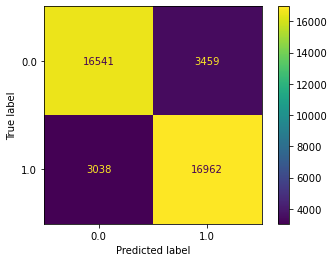

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=1)


pipe1 = create_pipeline('xgb', XGBClassifier(class_weight='balanced', n_jobs=-1, random_state=0))
pipe1.fit(X_train, y_train)
preds1 = pipe1.predict(X_test)
print_metrics(preds1, y_test, pipe1)

Model results:  Pipeline
              precision    recall  f1-score   support

         0.0       0.60      0.46      0.52     20000
         1.0       0.56      0.69      0.62     20000

    accuracy                           0.57     40000
   macro avg       0.58      0.57      0.57     40000
weighted avg       0.58      0.57      0.57     40000

Confusion matrix:


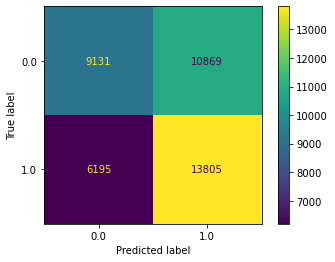

In [24]:
pipe2 = create_pipeline('svm', SVC())
pipe2.fit(X_train, y_train)
preds2 = pipe2.predict(X_test)
print_metrics(preds2, y_test, pipe2)

In [25]:
accuracy_score(preds1, preds2)

0.599625

Model results:  Pipeline
              precision    recall  f1-score   support

         0.0       0.84      0.83      0.83     20000
         1.0       0.83      0.84      0.83     20000

    accuracy                           0.83     40000
   macro avg       0.83      0.83      0.83     40000
weighted avg       0.83      0.83      0.83     40000

Confusion matrix:


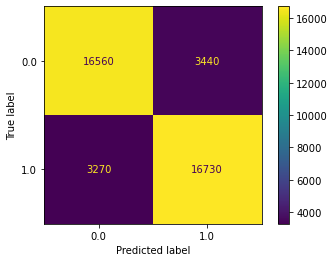

In [32]:
pipe3 = create_pipeline('log', RandomForestClassifier())
pipe3.fit(X_train, y_train)
preds3 = pipe3.predict(X_test)
print_metrics(preds3, y_test, pipe3)

In [33]:
accuracy_score(preds1, preds3)

0.932975

In [48]:
def voting(preds1, preds2, preds3):
    final_preds = []
    for p1, p2, p3 in zip(list(preds1), list(preds2), list(preds3)):
        if p1+p2+p3 > 1:
            final_preds.append(1)
        else:
            final_preds.append(0)
    return final_preds

In [49]:
fnl = voting(preds1, preds2, preds3)
accuracy_score(fnl, y_test)

0.83615

### feature importance

In [ ]:
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, pipe1['classifier'].feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'importance'})
importances.sort_values(by='importance').plot(kind='barh',figsize=(12,12))

In [ ]:
importances.sort_values(by='importance', ascending=False)

## validation

In [50]:
data_path = r'C:\Users\IsmailKaraman\workspace\data\trendyol\\'
test_raw = pd.read_csv(data_path+'test_data.csv')
test_raw.head(2)

,id,expected
0,18115|87073974|726348863,NaN
1,27588|118753298|723169934,NaN


In [51]:
test = test_raw.copy()
test[['user_id', 'product_content_id', 'order_parent_id']] = test['id'].str.split('|',expand=True)
test = test[['user_id', 'product_content_id', 'order_parent_id','expected']]

In [52]:
test.head(3)

,user_id,product_content_id,order_parent_id,expected
0,18115,87073974,726348863,NaN
1,27588,118753298,723169934,NaN
2,29165,35699988,724122443,NaN


In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             7471 non-null   object 
 1   product_content_id  7471 non-null   object 
 2   order_parent_id     7471 non-null   object 
 3   expected            0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 233.6+ KB


In [54]:
test['user_id'] = test['user_id'].astype('int64') 
test['order_parent_id'] = test['order_parent_id'].astype('int64')
test['product_content_id'] = test['product_content_id'].astype('int64')

In [55]:
test_df = pd.merge(test, null_df, on=['user_id', 'product_content_id', 'order_parent_id'], how='left')
test_df.shape

(7471, 85)

In [56]:
test_X = test_df[categorical_str+categorical_int+numerical+numerical2+passthrough]
test_X.isna().sum()

is_saved_card_trx             0
gender                        0
zodiac                        0
rate                          0
gender_id                     0
category_id                   0
color_id                      0
order_weekday                 0
order_week                    0
brand_id                      0
order_day                     0
hour_interval                 0
n_unq_variants                0
original_price                0
discounted_price              0
ship_cost                     0
coupon_discount               0
age                           0
diff_order_memdate            0
total_claim                   0
promotion_award_value         0
discount_ratio                0
paid_amount                   0
neg_comment                   0
pos_comment                   0
review_like_count             0
returnRate                    0
returnRate_def                0
unresolvedclaim_percentage    0
unresolved_percentage         0
is_elite_user                 0
is_walle

In [57]:
expected1 = pipe1.predict(test_df[categorical_str+categorical_int+numerical+numerical2+passthrough])
expected2 = pipe2.predict(test_df[categorical_str+categorical_int+numerical+numerical2+passthrough])
expected3 = pipe3.predict(test_df[categorical_str+categorical_int+numerical+numerical2+passthrough])

In [60]:
fnl_exp = voting(expected1, expected2, expected3)

In [74]:
test_raw['expected'] = expected1

In [75]:
test_raw['expected'] = test_raw['expected'].astype('int32')

In [76]:
old_output = pd.read_csv('output.csv')
accuracy_score(fnl_exp, old_output['expected'])

0.5248293401151117

In [77]:
output

NameError: name 'output' is not defined

In [78]:
test_raw.to_csv('output.csv', index=False)

## auto ml

In [ ]:
def evaluate_model_with_CV(X, y, model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_validate(pipeline, X, y, scoring=['accuracy', 'f1_weighted'], n_jobs=-1, 
                        return_estimator=True, return_train_score=True, cv=cv)
    # ['fit_time', 'score_time', 'estimator', 'test_accuracy', 'train_accuracy', 'test_f1_weighted', 'train_f1_weighted']
    return scores

In [ ]:
def print_metrics(y_pred, y_test, model):
    print("Model results: ", type(model).__name__)
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
    disp.plot()

In [ ]:
def create_pipeline_without_clf(clf_name, clf_object):
    
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])

    numeric_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean'))])
    
    categorical_str_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    
    categorical_int_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer, numerical),
                                                  ('num2', numeric_transformer2, numerical2),
                                                  ('cat_str1', categorical_str_transformer, categorical_str),
                                                  ('cat_int1', categorical_int_transformer, categorical_int),
                                                  ], 
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('f_selector', SelectKBest(f_classif, k='all')),
                          (clf_name, clf_object)], verbose=False)
    
    return pipeline

In [ ]:
CLASSIFIERS = [
 ('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('KNeighborsClassifier', sklearn.neighbors._classification.KNeighborsClassifier),
 ('LogisticRegression', sklearn.linear_model._logistic.LogisticRegression),
 ('XGBClassifier', XGBClassifier),
 ('LGBMClassifier', LGBMClassifier)]

In [ ]:
random_state = 10
Accuracy_mean = []
Accuracy_std = []
F1_mean = []
F1_std = []
names = []
TIME = []
predictions = {}
models = {}

for name, model in tqdm(CLASSIFIERS):
    start = time.time()
    try:
        if "random_state" in model().get_params().keys():
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline_without_clf("classifier", model(random_state=random_state, class_weight='balanced'))
            else:
                pipeline = create_pipeline_without_clf("classifier", model(random_state=random_state))
        else:
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline_without_clf("classifier", model(class_weight='balanced'))
            else:
                pipeline = create_pipeline_without_clf("classifier", model())
                
                                   
        results = evaluate_model_with_CV(X, y, model)
                        
        names.append(name)
        Accuracy_mean.append(results['test_accuracy'].mean())
        Accuracy_std.append(results['test_accuracy'].std())
        F1_mean.append(results['test_f1_weighted'].mean())
        F1_std.append(results['test_f1_weighted'].std())
        TIME.append(results['fit_time'].mean())
    
    except Exception as exception:
        print(name + " model failed to execute")
        print(exception)
                                   
scores = pd.DataFrame(
    {   "Model": names,
        "Accuracy Mean": Accuracy_mean,
        "Accuracy Std": Accuracy_std,
        "F1-Score Mean": F1_mean,
        "F1-Score Std": F1_std,
        "Time Taken": TIME, })

In [ ]:
scores.sort_values(by='F1-Score Mean', ascending=False)

In [ ]:
pos_df = merged_df[merged_df['is_returned']==1].sample(50000, random_state=11)
neg_df = merged_df[merged_df['is_returned']==0].sample(50000, random_state=11)

model_df = pd.concat([pos_df, neg_df], axis=0)
model_df.sample(frac=1)

y = model_df['is_returned']
X = model_df[categorical_str+categorical_int+numerical+numerical2+passthrough]


In [ ]:
random_state = 10
Accuracy_mean = []
Accuracy_std = []
F1_mean = []
F1_std = []
names = []
TIME = []
predictions = {}
models = {}

for name, model in tqdm(CLASSIFIERS):
    start = time.time()
    try:
        if "random_state" in model().get_params().keys():
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline_without_clf("classifier", model(random_state=random_state, class_weight='balanced'))
            else:
                pipeline = create_pipeline_without_clf("classifier", model(random_state=random_state))
        else:
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline_without_clf("classifier", model(class_weight='balanced'))
            else:
                pipeline = create_pipeline_without_clf("classifier", model())
                
                                   
        results = evaluate_model_with_CV(X, y, model)
                        
        names.append(name)
        Accuracy_mean.append(results['test_accuracy'].mean())
        Accuracy_std.append(results['test_accuracy'].std())
        F1_mean.append(results['test_f1_weighted'].mean())
        F1_std.append(results['test_f1_weighted'].std())
        TIME.append(results['fit_time'].mean())
    
    except Exception as exception:
        print(name + " model failed to execute")
        print(exception)
                                   
scores2 = pd.DataFrame(
    {   "Model": names,
        "Accuracy Mean": Accuracy_mean,
        "Accuracy Std": Accuracy_std,
        "F1-Score Mean": F1_mean,
        "F1-Score Std": F1_std,
        "Time Taken": TIME, })

In [ ]:
scores2.sort_values(by='F1-Score Mean', ascending=False)

In [ ]:
XGBClassifier
LGBMClassifier